In [ ]:
# 1. Understand the attributes of the dataset.
# 2. Cleaning/preprocessing of the dataset.
# 3. Pose 3 questions and answer them.

#Dataset link: https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data?select=Train.csv
# Link to Data set information: https://www.kaggle.com/yonatanrabinovich/bigmart-sales-data-analysis-and-prediction
#MRP: Maximum retail price for a product

#Question 1: which of the the 3 tiers get the highest sales ?
#Question 2: would the size of the outlet get more sales ?
#Question 4: would teh item fat content affect its sales rate?
#Question 5: would Item Visibility affect its sales rate?

In [ ]:
from google.colab import files
  
uploaded = files.upload()

Saving Train.csv to Train.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


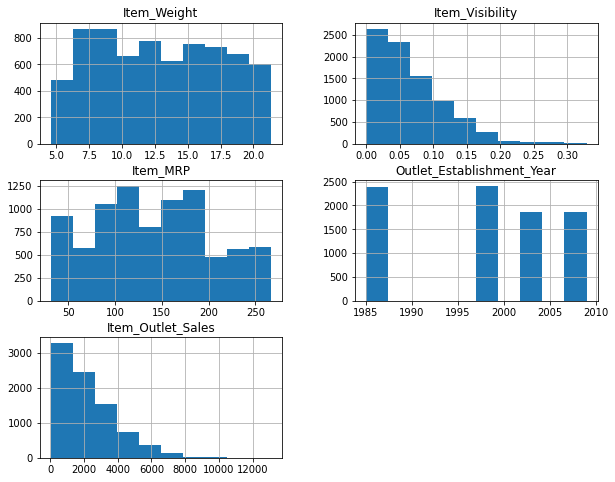

In [ ]:
df.hist(figsize=(10,8));

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Outlet_Size
High      2298.995256
Medium    2172.116599
Small     2358.343066
Name: Item_Outlet_Sales, dtype: float64


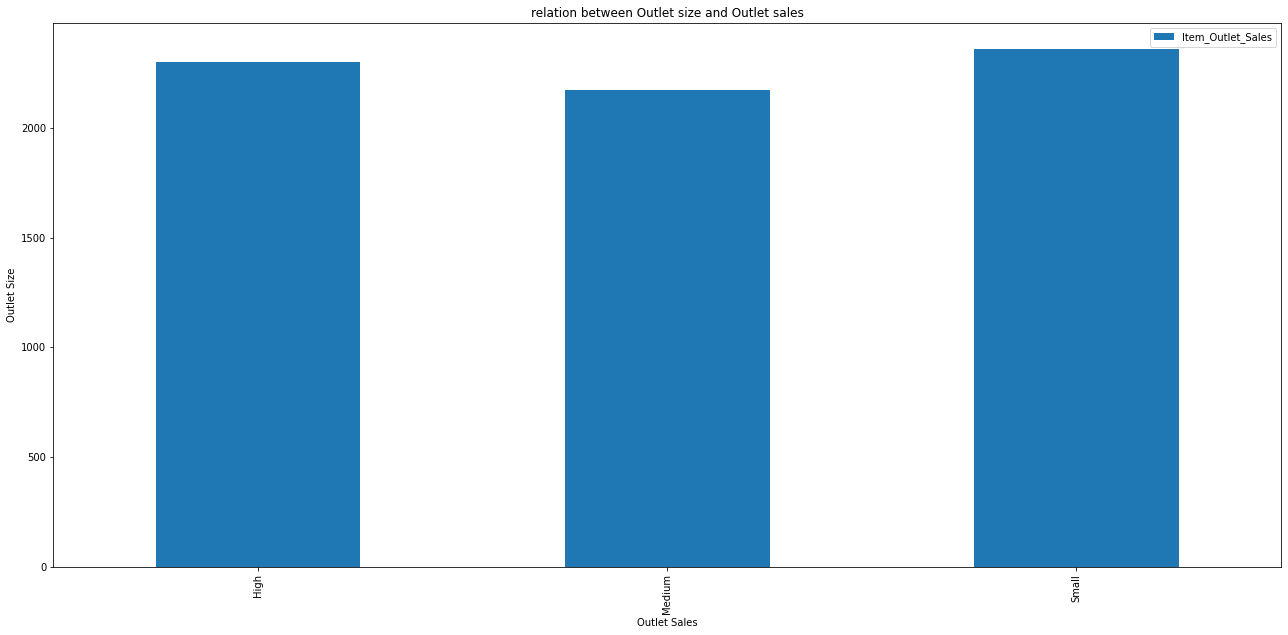

In [ ]:
#Question 2: would the size of the outlet get more sales ? 
print(df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean())
df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot(kind = 'bar',figsize=(22,10))
plt.xlabel("Outlet Sales")
plt.ylabel("Outlet Size")
plt.title("relation between Outlet size and Outlet sales")
plt.legend();


In [ ]:
df['Item_Fat_Content'].replace({'LF' : 'Low Fat'}, inplace=True)

In [ ]:
df['Item_Fat_Content'].replace({'low fat' : 'Low Fat'}, inplace=True)

In [ ]:
df['Item_Fat_Content'].replace({'reg' : 'Regular'}, inplace=True)

Item_Fat_Content
Low Fat    2262.228377
Regular    2289.939414
Name: Item_Outlet_Sales, dtype: float64


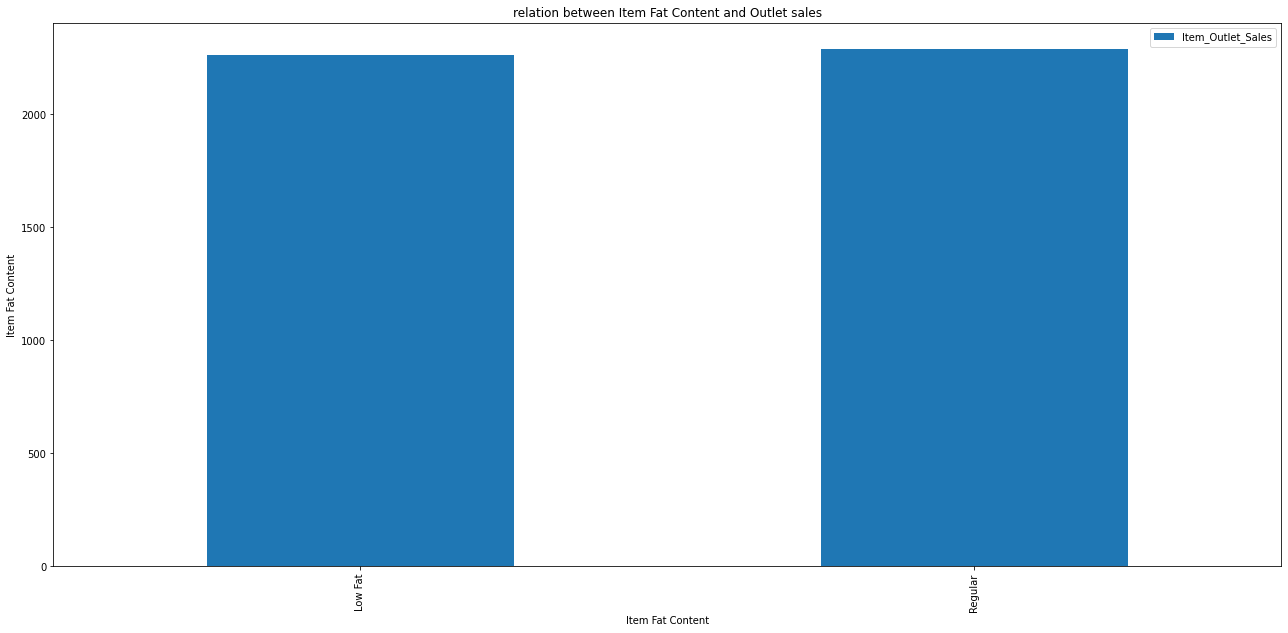

In [ ]:
#Question 4: would teh item fat content affect its sales rate?
print(df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean())
df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().plot(kind = 'bar',figsize=(22,10))
plt.xlabel("Item Fat Content")
plt.ylabel("Item Outlet Sales")
plt.title("relation between Item Fat Content and Outlet sales")
plt.legend();

In [ ]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.010229,0.033330,-0.010596,0.010972
Item_Visibility,-0.010229,1.000000,-0.007292,0.009324,-0.009644
Item_MRP,0.033330,-0.007292,1.000000,0.004105,0.679594
Outlet_Establishment_Year,-0.010596,0.009324,0.004105,1.000000,-0.040869
Item_Outlet_Sales,0.010972,-0.009644,0.679594,-0.040869,1.000000


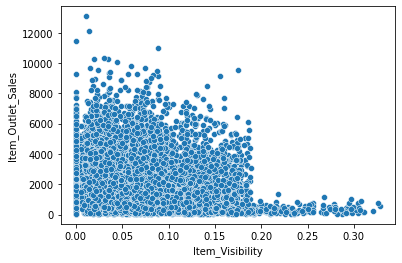

In [ ]:
#Question 5: would Item Visibility affect its sales rate?
sns.scatterplot(x ='Item_Visibility', y = 'Item_Outlet_Sales' ,data = df )